In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM
import math
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('main_dataframe.csv')

In [3]:
tdf = pd.DataFrame(df, columns = ['Date','NVDA Close','NVDA Open','NVDA Low','NVDA High','NVDA Volume'])
tdf = tdf.iloc[::-1]
tdf = tdf.tail(500)  

In [4]:
close_data = tdf.filter(['NVDA Close'])
dataset = close_data.values


In [5]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

In [6]:
training_data_len = math.ceil(len(dataset) *.8)
train_data = scaled_data[0:training_data_len  , : ]

In [7]:
x_train_data=[]
y_train_data =[]
for i in range(60,len(train_data)):
    x_train_data=list(x_train_data)
    y_train_data=list(y_train_data)
    x_train_data.append(train_data[i-60:i,0])
    y_train_data.append(train_data[i,0])
    
    x_train_data1, y_train_data1 = np.array(x_train_data), np.array(y_train_data)
    
    x_train_data2 = np.reshape(x_train_data1, (x_train_data1.shape[0],x_train_data1.shape[1],1))

In [8]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train_data2.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [9]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train_data2, y_train_data1, batch_size=1, epochs=1)

340/340 [==============================] - 8s 17ms/step - loss: 0.0069


In [10]:
test_data = scaled_data[training_data_len - 60: , : ]
x_test = []
y_test =  dataset[training_data_len : , : ]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [11]:
x_test = np.array(x_test)

In [12]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

4/4 [==============================] - 1s 10ms/step


In [13]:
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
print(rmse)

18.343576769196364


C:\Users\vovik\AppData\Local\Temp/ipykernel_11876/2931567003.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


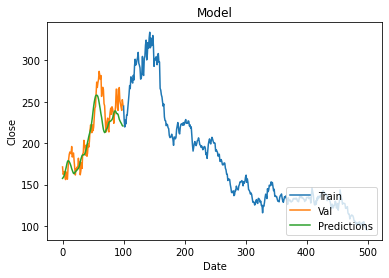

In [14]:
train = tdf[:training_data_len]
valid = tdf[training_data_len:]
 
valid['Predictions'] = predictions
 
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close')
 
plt.plot(train['NVDA Close'])
plt.plot(valid[['NVDA Close', 'Predictions']])
 
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
 
plt.show()

In [15]:
Data = list(zip(predictions, y_test))
df = pd.DataFrame(Data,columns=['Predictions', 'Actual'])
df

,Predictions,Actual
0,[220.66339],[246.38]
1,[221.11516],[252.42]
2,[222.89388],[239.48]
3,[224.2464],[243.19]
4,[225.56718],[247.28]
...,...,...
95,[164.56041],[158.8]
96,[161.6604],[165.66]
97,[159.76155],[163.6]
98,[158.44928],[162.25]
